In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
data_path = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load data
phish = pd.read_csv(data_path + '/phishing.csv')
phish.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [0]:
#remove id column
del phish['id']
phish = phish.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8b2a05cc0>,
      dtype=object)

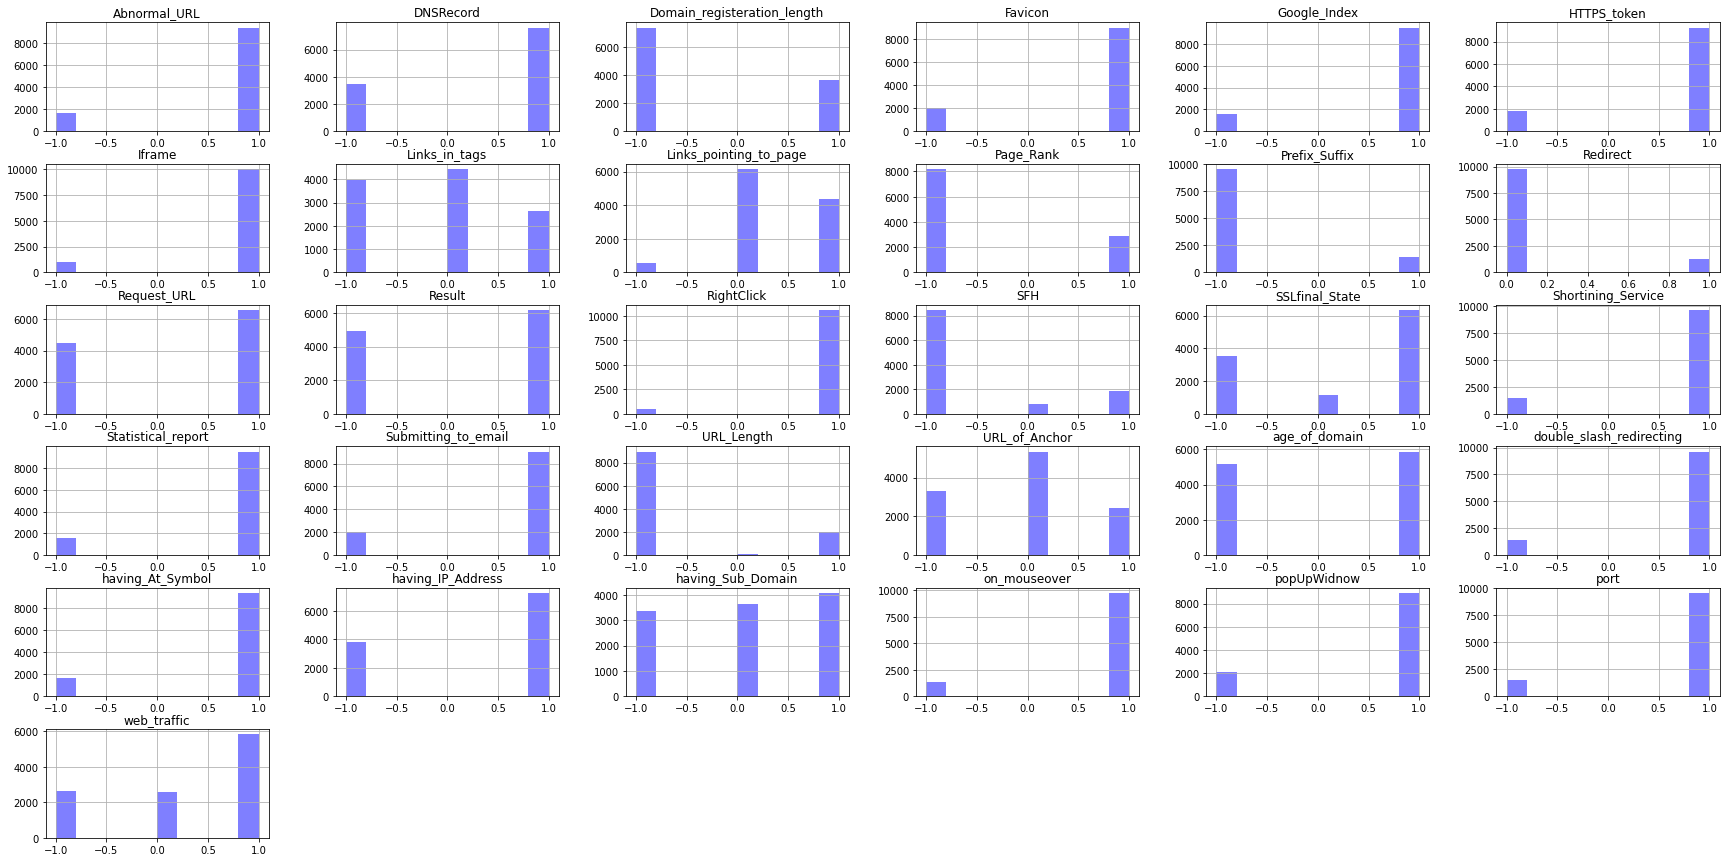

In [4]:
phish.hist(color='b', alpha=0.5, bins=10, figsize= (30,15))

In [0]:
phish['Result'] = phish['Result'].map({-1 : 0, 1:1})
phish['DNSRecord'] = phish['DNSRecord'].map({-1 : 0, 1:1})
phish['Domain_registeration_length'] = phish['Domain_registeration_length'].map({-1 : 0, 1:1})
phish['Favicon'] = phish['Favicon'].map({-1 : 0, 1:1})
phish['Google_Index'] = phish['Google_Index'].map({-1 : 0, 1:1})

phish['HTTPS_token'] = phish['HTTPS_token'].map({-1 : 0, 1:1})
phish['Iframe'] = phish['Iframe'].map({-1 : 0, 1:1})
phish['Page_Rank'] = phish['Page_Rank'].map({-1 : 0, 1:1})
phish['Prefix_Suffix'] = phish['Prefix_Suffix'].map({-1 : 0, 1:1})

phish['Request_URL'] = phish['Request_URL'].map({-1 : 0, 1:1})
phish['Abnormal_URL'] = phish['Abnormal_URL'].map({-1 : 0, 1:1})
phish['RightClick'] = phish['RightClick'].map({-1 : 0, 1:1})
phish['Shortining_Service'] = phish['Shortining_Service'].map({-1 : 0, 1:1})
phish['Statistical_report'] = phish['Statistical_report'].map({-1 : 0, 1:1})
phish['Submitting_to_email'] = phish['Submitting_to_email'].map({-1 : 0, 1:1})

phish['double_slash_redirecting'] = phish['double_slash_redirecting'].map({-1 : 0, 1:1})
phish['age_of_domain'] = phish['age_of_domain'].map({-1 : 0, 1:1})
phish['having_At_Symbol'] = phish['having_At_Symbol'].map({-1 : 0, 1:1})
phish['having_IP_Address'] = phish['having_IP_Address'].map({-1 : 0, 1:1})
phish['on_mouseover'] = phish['on_mouseover'].map({-1 : 0, 1:1})
phish['popUpWidnow'] = phish['popUpWidnow'].map({-1 : 0, 1:1})
phish['port'] = phish['port'].map({-1 : 0, 1:1})

In [6]:
phish

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,1,1,0,0,-1,-1,0,1,1,0,1,-1,1,-1,0,0,0,1,1,1,1,0,0,-1,0,1,1,0,0
1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,-1,-1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0
2,1,0,1,1,1,0,-1,-1,0,1,1,0,1,0,-1,-1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0
3,1,0,1,1,1,0,-1,-1,1,1,1,0,0,0,0,-1,1,1,0,1,1,1,1,0,0,1,0,1,-1,1,0
4,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,-1,1,1,0,0,1,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,0,1,1,1,1,0,0,0,1,1,1,1,-1,0,1,0,0,0,0,0,1,1,-1,0,1,1,1,1
11051,0,1,1,0,0,0,1,-1,0,0,0,1,1,-1,-1,0,0,0,1,0,1,0,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,0,1,-1,0,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0
11053,0,-1,1,1,1,0,-1,-1,1,0,1,1,0,-1,1,-1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0


In [7]:
phish.rename(columns={"popUpWidnow": "popUpWindow", "Domain_registeration_length": "Domain_registration_length"})

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,1,1,0,0,-1,-1,0,1,1,0,1,-1,1,-1,0,0,0,1,1,1,1,0,0,-1,0,1,1,0,0
1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,-1,-1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0
2,1,0,1,1,1,0,-1,-1,0,1,1,0,1,0,-1,-1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0
3,1,0,1,1,1,0,-1,-1,1,1,1,0,0,0,0,-1,1,1,0,1,1,1,1,0,0,1,0,1,-1,1,0
4,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,-1,1,1,0,0,1,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,0,1,1,1,1,0,0,0,1,1,1,1,-1,0,1,0,0,0,0,0,1,1,-1,0,1,1,1,1
11051,0,1,1,0,0,0,1,-1,0,0,0,1,1,-1,-1,0,0,0,1,0,1,0,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,0,1,-1,0,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0
11053,0,-1,1,1,1,0,-1,-1,1,0,1,1,0,-1,1,-1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0


In [0]:
phish_temp = pd.get_dummies(phish, prefix=['Links_in_tags', 'Links_pointing_to_page', 'SFH', 'SSLfinal_State', 'URL_Length', 'URL_of_Anchor', 'having_Sub_Domain', 'web_traffic'], columns = ['Links_in_tags', 'Links_pointing_to_page', 'SFH', 'SSLfinal_State', 'URL_Length', 'URL_of_Anchor', 'having_Sub_Domain', 'web_traffic'], drop_first=True)

In [9]:
phish_temp = phish_temp.dropna()
phish_y = phish_temp['Result']
phish_x = phish_temp.drop('Result', axis=1)
phish_x

,having_IP_Address,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Page_Rank,Google_Index,Statistical_report,Links_in_tags_0,Links_in_tags_1,Links_pointing_to_page_0,Links_pointing_to_page_1,SFH_0,SFH_1,SSLfinal_State_0,SSLfinal_State_1,URL_Length_0,URL_Length_1,URL_of_Anchor_0,URL_of_Anchor_1,having_Sub_Domain_0,having_Sub_Domain_1,web_traffic_0,web_traffic_1
0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0
2,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
11051,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
11052,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
11053,0,1,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt

#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(phish_x, phish_y, test_size=0.33, random_state=14)

In [11]:
y_train.head()

7891     0
10174    1
8296     1
7565     0
9571     0
Name: Result, dtype: int64

______________________________________________________________________

Below we use a logistic regression model in order to predict if a URL is malicious and also print out a confusion matrix, accuracy, recall, f1 score, and precision statistics.

_______________________________________________________________________


accuracy score: 0.9421759386133187


Text(91.68, 0.5, 'predicted label')

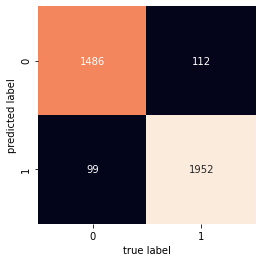

In [12]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
lrmodel = logreg.fit(X_train, y_train)

#predict
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

# Evaluate accuracy
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))

#get confusion matrix for logreg
cnf_matrix = metrics.confusion_matrix(y_test, y_pred).T
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, y_pred)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, y_pred)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, y_pred)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, y_pred)))

print("Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on")

The error rate is 0.05782406138668128
The precision score is 0.9457364341085271
The recall score is 0.9517308629936616
The F1 score is 0.9487241798298907
Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on


______________________________________________________________________

Below we use a random forest model in order to predict if a URL is malicious and also in order to identify which fatures are the most important when predicting if a URL is malicious.

_______________________________________________________________________




In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(max_features=30, max_depth=3 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )# Fit on training data
model_rf.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model_rf.predict(X_test)
# Probabilities for each class
rf_probs = model_rf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [0]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[5,10],
              "max_features": [15, 25]}

In [17]:
grid_search = GridSearchCV(model_rf, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features=30,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=3,
                                           

In [18]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9658993986918807
{'max_depth': None, 'max_features': 15, 'n_estimators': 5}


In [19]:
rf = RandomForestClassifier(max_depth=None, max_features = 25, n_estimators = 5)
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.0119607  0.00297178 0.00406679 0.00221055 0.02670826 0.01344267
 0.00262179 0.00127484 0.00380417 0.01138976 0.0050983  0.00331459
 0.00455909 0.00261687 0.00282328 0.00319761 0.00145278 0.01337248
 0.01134528 0.01104287 0.01096398 0.00294483 0.01754404 0.015114
 0.00998393 0.00988624 0.00390465 0.00569531 0.00512497 0.55600013
 0.00067916 0.00891126 0.04472555 0.09036749 0.01245406 0.02100816
 0.03248581 0.01293195]


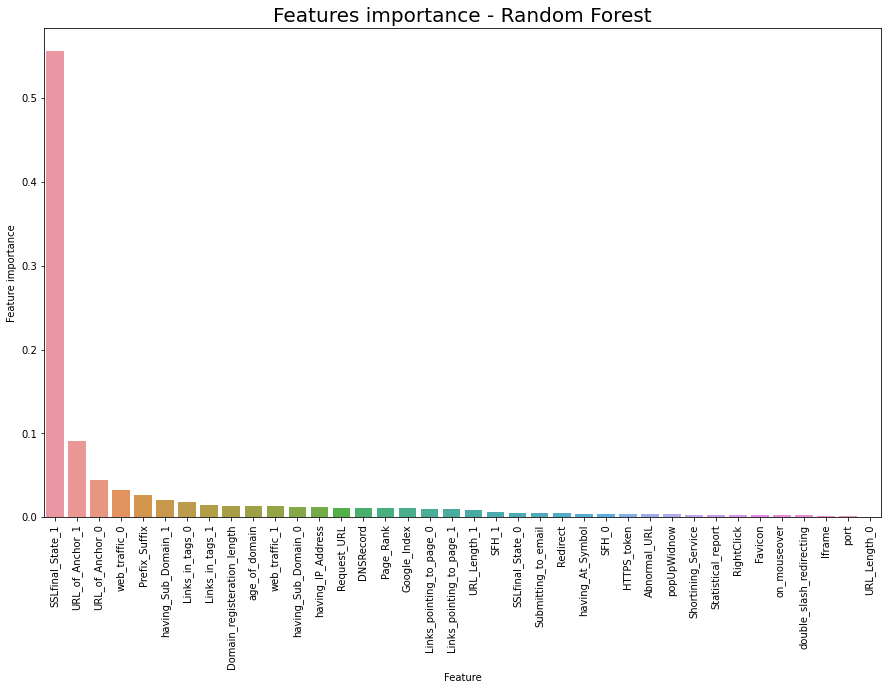

In [23]:
features = ["having_IP_Address",	"Shortining_Service",	"having_At_Symbol",	"double_slash_redirecting",	"Prefix_Suffix",	"Domain_registeration_length",	"Favicon",	"port",	"HTTPS_token",	"Request_URL",	"Submitting_to_email",	"Abnormal_URL",	"Redirect",	"on_mouseover",	"RightClick",	"popUpWidnow",	"Iframe",	"age_of_domain",	"DNSRecord",	"Page_Rank",	"Google_Index",	"Statistical_report",	"Links_in_tags_0",	"Links_in_tags_1",	"Links_pointing_to_page_0",	"Links_pointing_to_page_1",	"SFH_0",	"SFH_1",	"SSLfinal_State_0",	"SSLfinal_State_1",	"URL_Length_0",	"URL_Length_1",	"URL_of_Anchor_0",	"URL_of_Anchor_1",	"having_Sub_Domain_0",	"having_Sub_Domain_1",	"web_traffic_0",	"web_traffic_1"]
plt.figure(figsize = (15,9))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

0.9040833104960263


Text(91.68, 0.5, 'predicted label')

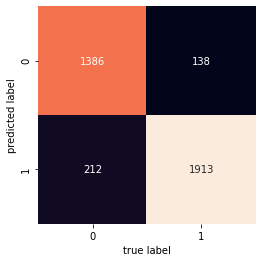

In [24]:
print(accuracy_score(y_test, rf_predictions))

#confusion matrix
matrf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(matrf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')